In [1]:
%run supportvectors-common.ipynb



<div style="color:#aaa;font-size:8pt">
<hr/>

 </blockquote>
 <hr/>
</div>



# Visualization of networks

Networks are ubiquitous: the internet, our social world, highways, electrical grids, and even the neurons in our brain are networks. Visualizing a network often yields deep insights that is otherwise hard to infer with statistical properties alone.

In this notebook, we will take a brief journey into the world networks and their visualization. There are many excellent network/graph libraries. Some, like `networkx` provide in-depth support for network related algorithms, and also some support for visualization. Others, like `pyvis` focus primarily on the visualization of networks.

Let us start by installing the needed libraries, if case they don't exist on our machines.

## Installation of network libraries

Here we will install two of the popular and powerful libraries.  Run the following section of code only once, since we need not repeat the installation process.

In [2]:
!pip install networkx --upgrade
!pip install pyvis --upgrade

In [3]:
import networkx as nx
from pyvis.network import Network

from matplotlib import rc
rc ('font', family='serif')
rc ('text', usetex=True)  
rc ('font', size=16)

plt.style.use ('ggplot')                      # emulate ggplot style
plt.rcParams['legend.fontsize' ] = 13         # legend font size
plt.rcParams[ 'axes.labelsize' ] = 13         # axis label font size
plt.rcParams['figure.dpi'] = 72   
plt.rcParams[ 'figure.figsize' ] = '15,8'            # resize

## Some well-known networks

In order to see the variety of networks and topologies, let us consider some simple, well-known networks.

### Star network

Let us start our exploration with a simple network, which has a star topology -- i.e. there is one central node, and all other nodes are connected to the central node, but not to each other. Play around with the number of nodes to see how it looks.



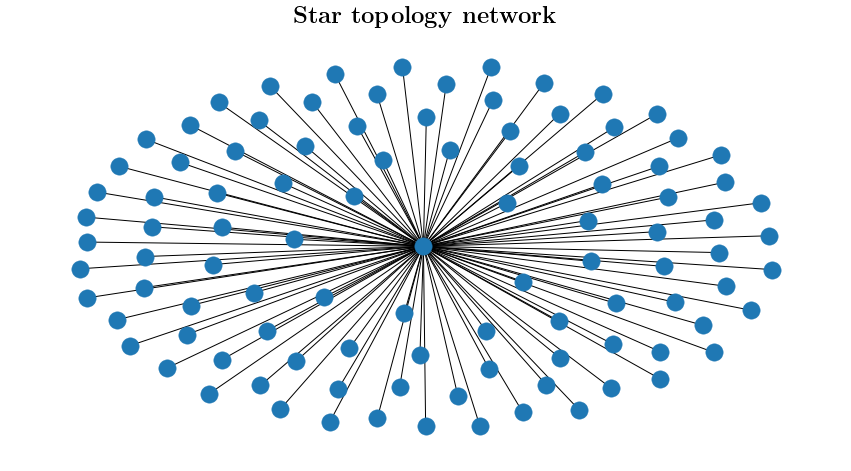

In [4]:
# instantiate a star network of one hub node, and 100 outer nodes.
N = 100
star = nx.star_graph(N) 

plt.title(r'\textbf{Star topology network}', size=24)
# draw the network
nx.draw(star)

Note that this plot is simply an static image; we don't have any interactivity with it. In order to bring that, let us now use the `pyvis` library instead. The below code will create an interactive version of the graph, and save it in the file `star_network.html`. At the same time, it will open the created file in another tab/window.

In [5]:
# instantiate a star network of one hub node, and 100 outer nodes.
N = 100
star = nx.star_graph(N) 

# instantiate the pyvis network object
net = Network ( height='600px', width='600px')
# load data from the cluster-graph
net.from_nx(star)

# show buttons for visualization options
net.show_buttons()

# open the graph in another tab/window
net.show('star_network.html')

### Complete graph

A complete graph is a fully connected network in which every node is connected to every other node.

In this exercise, we will draw the nodes and edges separately, so we can control their aesthetic elements.

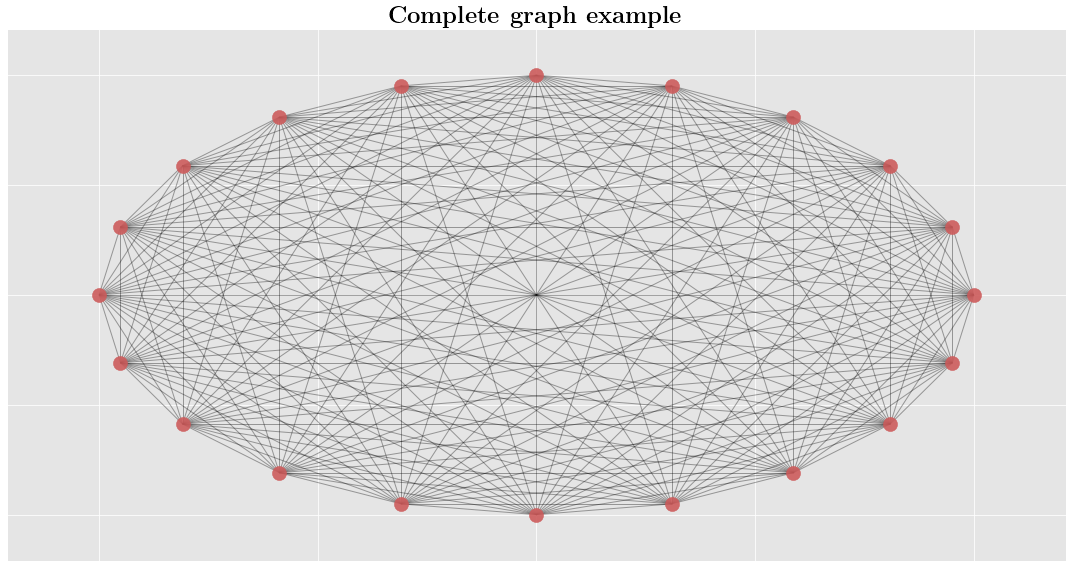

In [6]:
plt.rcParams[ 'figure.figsize' ] = '15,8'            # resize
# instantiate a complete-graph network of 20 nodes
N = 20
complete = nx.complete_graph(N) 

# we explicitly choose a circular layout, given the symmetry.
pos=nx.circular_layout(complete)

# first, let us draw the nodes
nx.draw_networkx_nodes(complete, 
                       pos = pos,
                       node_size=200, 
                       alpha=0.9, 
                       node_color='IndianRed', 
                      )

# next, let us draw the edges.
nx.draw_networkx_edges(complete, 
                       pos=pos,
                       alpha=0.35, 
                       edge_color='black')

plt.title(r'\textbf{Complete graph example}', size=24)
plt.tight_layout()


### Zachary's karate club

This is the network of friendships within the members of a karate club at a university. Observing this, can you deduce which are the influential nodes? In the case of conflict, would you be able to guess how the club will break up, looking at the structure of the network?

There is an interesting history behind the dataset; the club did split in two. It turns out that using network science/graph-theory, Zachary successfully predicted the membership of the two sub-groups that formed, with only one error in prediction. Read more about it at: https://en.wikipedia.org/wiki/Zachary%27s_karate_club


If we are using `networkx`, it is advisable to use the graphviz library's layout engine, `graphviz_layout`. However, if you do not have the graphviz installed on your machine, then do not use it. If you do have the graphviz, then install `pygraphviz` library, and change some of the layouts in the examples below to graphviz, to see its effect.



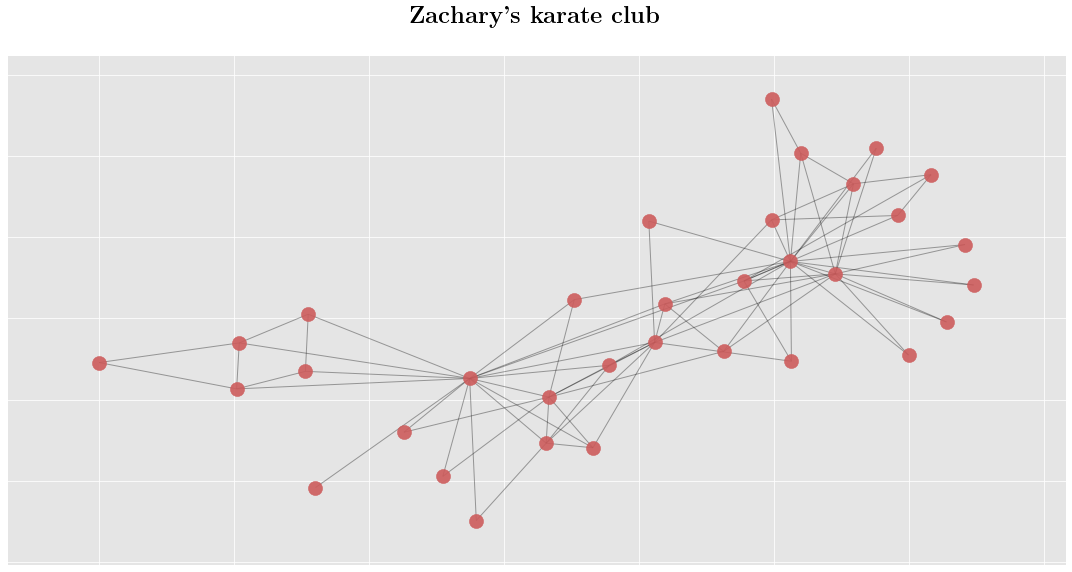

In [7]:
from networkx.drawing.layout import spring_layout
karate = nx.karate_club_graph()
pos=spring_layout(karate)

# first, let us draw the nodes
nx.draw_networkx_nodes(karate, 
                       pos = pos,
                       node_size=200, 
                       alpha=0.9, 
                       node_color='IndianRed', 
                      )

# next, let us draw the edges.
nx.draw_networkx_edges(karate, 
                       pos=pos,
                       alpha=0.35, 
                       edge_color='black')

plt.title(r"\textbf{Zachary's karate club}", size=24, y=1.05)
plt.tight_layout()

Let us also render it with a shell layout, to see if it gives us further intuition. What do you observe?

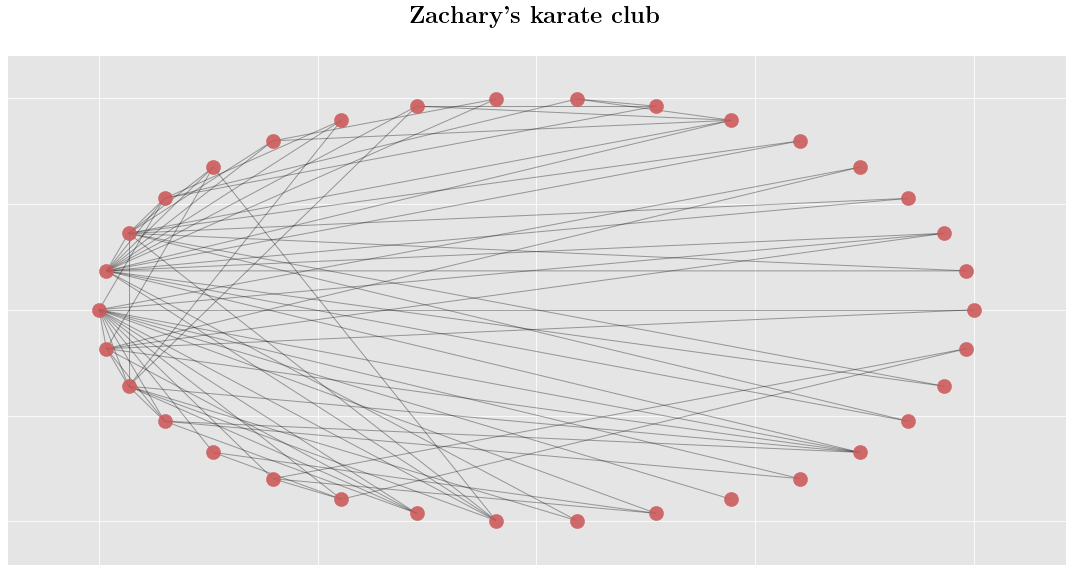

In [8]:
from networkx.drawing.layout import shell_layout
karate = nx.karate_club_graph()
pos=shell_layout(karate)

# first, let us draw the nodes
nx.draw_networkx_nodes(karate, 
                       pos = pos,
                       node_size=200, 
                       alpha=0.9, 
                       node_color='IndianRed', 
                      )

# next, let us draw the edges.
nx.draw_networkx_edges(karate, 
                       pos=pos,
                       alpha=0.35, 
                       edge_color='black')

plt.title(r"\textbf{Zachary's karate club}", size=24, y=1.05)
plt.tight_layout()

In [9]:
from networkx.drawing.layout import shell_layout
karate = nx.karate_club_graph()
# instantiate the pyvis network object
net = Network ( height='600px', width='1200px')
# load data from the cluster-graph
net.from_nx(karate)

# show buttons for visualization options
net.show_buttons()

# open the graph in another tab/window
net.show('karate_club_network.html')

### Facebook social network

As a gregarious species, we tend to live as social networks. A recent phenomenon of the last two decades has been the emergence of online social networks, where interactions are digital or virtual, through messages, posts, shares, likes, comments, etc.

Let us visualize a network that has been taken from a part of the facebook network.

In [10]:
!wget https://raw.githubusercontent.com/supportvectors/viz-datasets/main/facebook_combined.txt

social = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype=int)
print(nx.info(social))

--2022-01-29 05:33:29--  https://raw.githubusercontent.com/supportvectors/viz-datasets/main/facebook_combined.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 854362 (834K) [text/plain]
Saving to: ‘facebook_combined.txt.1’

facebook_combined.t 100%[===================>] 834.34K  4.42MB/s    in 0.2s    

2022-01-29 05:33:29 (4.42 MB/s) - ‘facebook_combined.txt.1’ saved [854362/854362]

Graph with 4039 nodes and 88234 edges


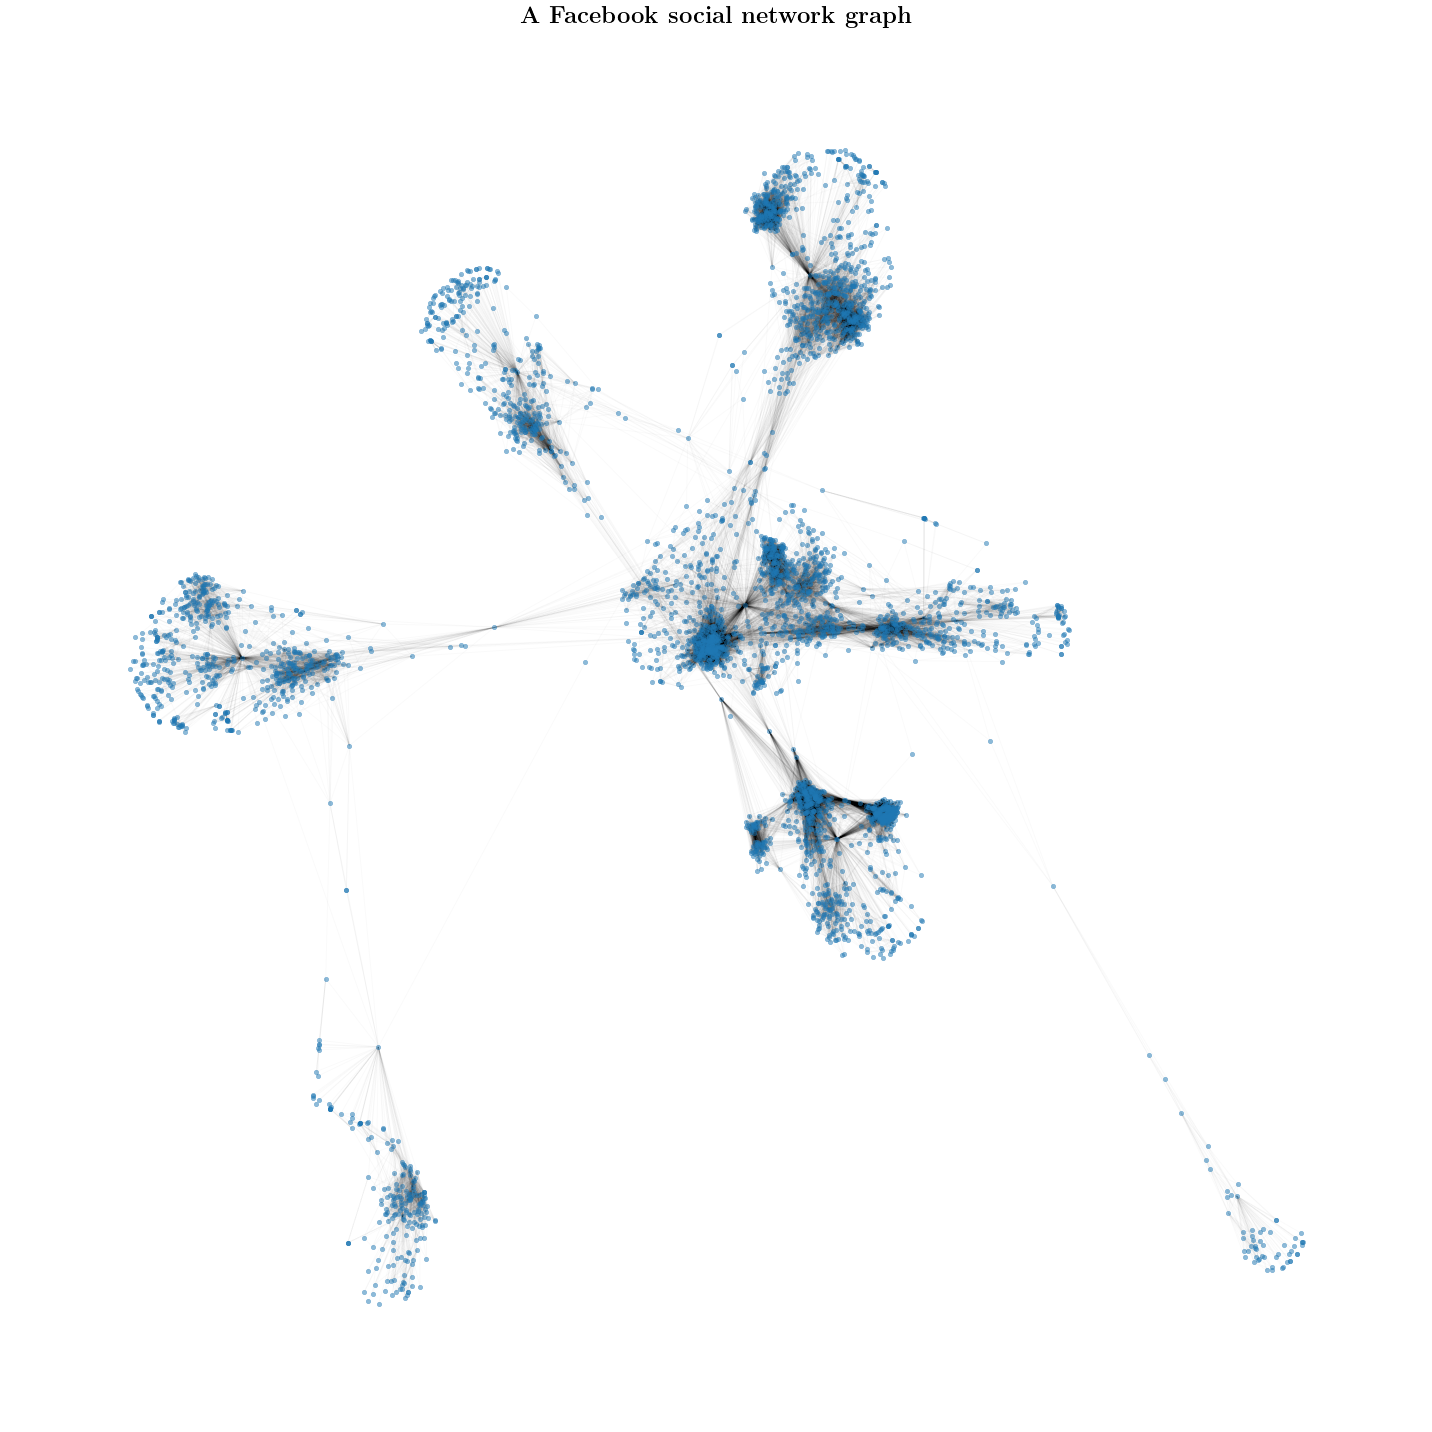

In [11]:
pos = nx.spring_layout(social)


plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(social, 
                       pos=pos,        
                       alpha=0.5,
                       node_size = 20)
nx.draw_networkx_edges(social, 
                       pos=pos,        
                       alpha=0.02)
plt.axis('off')
plt.title(r'\textbf{A Facebook social network graph}', size=24)
plt.tight_layout()

### Caveat Emptor
You can try to visualize this network interactively, using `pyvis`; the visualization does come through eventually, but it takes a very long time, so we will not do it in the regular learning session. Consider this an exercise to try on your own later!

## Final thoughts

When we look at the networks, one is tempted to ask for nodes that are in some sense central. There are simple centrality measures such as the number of edges associated with a node, but there are other interesting ones too.

Likewise, one would be tempted to "cluster" the network nodes into *communities*. Community detection in a network is rich topic in its own right. These topics belong to the field of network science. Network science is a rich and vast subject, that is rapidly evolving.

One great place to start is the online Barabasi's awesome book: http://networksciencebook.com/. It has some beautiful network visualizations along with a lucid introduction to the field.